<a href="https://colab.research.google.com/github/DanielBojchovski/diabetes_deep_neural_network/blob/main/diabetes_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Collection & Processing


In [2]:
data_frame = pd.read_csv("/content/sample_data/diabetes.csv")

In [3]:
# print the first 5 rows of the dataframe
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Get the count of Zeros in columns 
count = (data_frame['Glucose'] == 0).sum()
print('Count of zeros in Column  Glucose : ', count)
count = (data_frame['BloodPressure'] == 0).sum()
print('Count of zeros in Column  BloodPressure : ', count)
count = (data_frame['SkinThickness'] == 0).sum()
print('Count of zeros in Column  SkinThickness : ', count)
count = (data_frame['Insulin'] == 0).sum()
print('Count of zeros in Column  Insulin : ', count)
count = (data_frame['BMI'] == 0).sum()
print('Count of zeros in Column  BMI : ', count)
count = (data_frame['DiabetesPedigreeFunction'] == 0).sum()
print('Count of zeros in Column  DiabetesPedigreeFunction : ', count)
count = (data_frame['Age'] == 0).sum()
print('Count of zeros in Column  Age : ', count)

Count of zeros in Column  Glucose :  5
Count of zeros in Column  BloodPressure :  35
Count of zeros in Column  SkinThickness :  227
Count of zeros in Column  Insulin :  374
Count of zeros in Column  BMI :  11
Count of zeros in Column  DiabetesPedigreeFunction :  0
Count of zeros in Column  Age :  0


Replacing the zero values with the mean

In [8]:
avg = data_frame['Glucose'].mean()
data_frame['Glucose'] = data_frame['Glucose'].replace(0, avg)
avg = data_frame['BloodPressure'].mean()
data_frame['BloodPressure'] = data_frame['BloodPressure'].replace(0, avg)
avg = data_frame['SkinThickness'].mean()
data_frame['SkinThickness'] = data_frame['SkinThickness'].replace(0, avg)
avg = data_frame['Insulin'].mean()
data_frame['Insulin'] = data_frame['Insulin'].replace(0, avg)
avg = data_frame['BMI'].mean()
data_frame['BMI'] = data_frame['BMI'].replace(0, avg)

Separating the features and target

In [10]:
X = data_frame.drop(columns='Outcome', axis=1)
Y = data_frame['Outcome']

Splitting the data into training data & Testing data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

Building the Neural Network

In [15]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [19]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(8,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [20]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
18/18 [==============================] - 1s 12ms/step - loss: 0.7608 - accuracy: 0.5109 - val_loss: 0.7232 - val_accuracy: 0.5806
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5815 - val_loss: 0.6459 - val_accuracy: 0.6452
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6196 - val_loss: 0.5881 - val_accuracy: 0.6774
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6522 - val_loss: 0.5433 - val_accuracy: 0.7097
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.6721 - val_loss: 0.5109 - val_accuracy: 0.7097
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.6938 - val_loss: 0.4846 - val_accuracy: 0.7581
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7029 - val_loss: 0.4660 - val_accuracy: 0.7742
Epoch 8/10
18/18 [=

Visualizing accuracy and loss

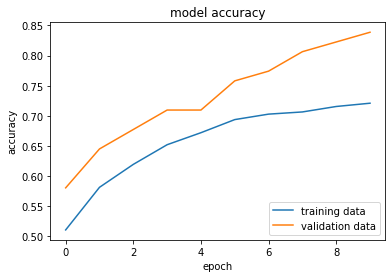

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

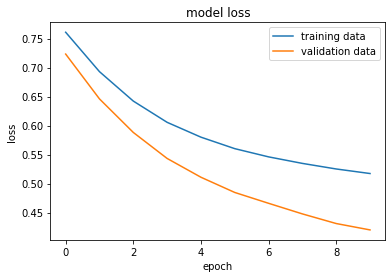

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [28]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

print(X_test_std.shape)
print(X_test_std[0])

5/5 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7403
0.7402597665786743
(154, 8)
[-0.56211528 -1.12707816  0.13948964 -0.77582494 -0.70033005 -0.48335864
 -0.72413845 -0.96676677]


In [29]:
Y_pred = model.predict(X_test_std)

In [30]:
print(Y_pred.shape)
print(Y_pred[0])

(154, 2)
[0.42176205 0.05780235]


In [31]:
print(X_test_std)

[[-0.56211528 -1.12707816  0.13948964 ... -0.48335864 -0.72413845
  -0.96676677]
 [-0.56211528  0.21129397  0.97186592 ... -0.63075238 -0.56253608
  -0.53568849]
 [-1.15412006 -0.67007304  0.47244016 ...  0.32730697 -0.69769443
  -0.79433546]
 ...
 [-1.15412006  0.30922363  0.47244016 ...  0.0177801  -0.24226957
  -1.05298243]
 [ 0.32589188  0.47243975  2.96956898 ...  2.43503754 -0.7300149
   0.32646808]
 [-0.85811767 -1.61672649 -1.85821342 ... -1.36772111 -0.66831218
  -1.05298243]]


In [32]:
print(Y_pred)

[[0.42176205 0.05780235]
 [0.45304352 0.21741042]
 [0.5092539  0.20255196]
 [0.4851161  0.2581658 ]
 [0.48640475 0.42201838]
 [0.36865973 0.0564307 ]
 [0.3332832  0.04507071]
 [0.27715594 0.22003916]
 [0.4641401  0.04609871]
 [0.34844372 0.25295877]
 [0.49452072 0.39882293]
 [0.56658816 0.40306538]
 [0.10797489 0.10758579]
 [0.29141274 0.22151235]
 [0.41020647 0.05202642]
 [0.37891382 0.59464866]
 [0.280908   0.37566093]
 [0.3853606  0.02095649]
 [0.23378232 0.10429314]
 [0.21772662 0.47969568]
 [0.25218987 0.64757615]
 [0.3201666  0.2712162 ]
 [0.5124946  0.14357752]
 [0.3970873  0.35128945]
 [0.48636195 0.08630699]
 [0.5004031  0.31719583]
 [0.5151481  0.6942789 ]
 [0.43545815 0.40132883]
 [0.44282964 0.28620684]
 [0.47181094 0.41126755]
 [0.3966447  0.23876798]
 [0.4537473  0.65087247]
 [0.4064402  0.05616388]
 [0.4192448  0.35263517]
 [0.30077899 0.42673302]
 [0.21924645 0.52668554]
 [0.17230606 0.20753169]
 [0.28056246 0.5707754 ]
 [0.4246725  0.3589028 ]
 [0.45226482 0.06034845]


In [34]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [35]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


Building the predictive system

In [42]:
def predict_function(input):

  # change the input_data to a numpy array
  input_data_as_numpy_array = np.asarray(input)

  # reshape the numpy array as we are predicting for one data point
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

  # standardizing the input data
  input_data_std = scaler.transform(input_data_reshaped)

  prediction = model.predict(input_data_std)
  print(prediction)

  prediction_label = [np.argmax(prediction)]
  print(prediction_label)

  if (prediction_label[0] == 1):
    print("Diabetic")
  elif (prediction_label[0] == 0):
    print("Healthy")

In [45]:
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
predict_function(input_data)

[[0.42450368 0.5030855 ]]
[1]
Diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
input_data = (1, 85, 66, 29, 0, 26.6,	0.351, 31)
predict_function(input_data)

[[0.44172895 0.07065222]]
[0]
Healthy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
